# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

D:\Softwares\Anaconda\envs\AAIC\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

**Taking only 50K points as Training runs slower with many points**

In [3]:
import random
project_data = project_data.loc[random.sample(list(project_data.index), 50000)]

In [4]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (50000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [6]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [7]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [8]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [9]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
89949       42305  p174802  ec80bfc11c25a4c96c15504709140460           Mrs.   
88453      153498  p133636  dc2c461ba99a4f06fa391bc4bdfa474f           Mrs.   

      school_state project_submitted_datetime project_grade_category  \
89949           NY        2016-12-21 18:20:56          Grades PreK-2   
88453           SC        2017-01-04 08:31:30            Grades 9-12   

                                           project_title  \
89949                             Wiggle While You Work!   
88453  Learn By Doing- Art Supplies Create Outstandin...   

                                         project_essay_1  \
89949  As a teacher in a very diverse school district...   
88453  I teach 27 9-12 grade English Language Learner...   

                                         project_essay_2 project_essay_3  \
89949  Many students in my class are diagnosed with A...             NaN   
88453  Often high school students do not use art supp...             NaN   

      project_essay_4                           project_resource_summary  \
89949             NaN  My students need wobble chairs to allow moveme...   
88453             NaN  My students need a plethora of art supplies in...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
89949                                             1                    1   
88453                                             1                    0   

        clean_categories clean_subcategories  \
89949       SpecialNeeds        SpecialNeeds   
88453  Literacy_Language                 ESL   

                                                   essay  
89949  As a teacher in a very diverse school district...  
88453  I teach 27 9-12 grade English Language Learner...

In [10]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [11]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)

As a teacher in a very diverse school district, my students are faced with several challenges both in and out of the classroom. Despite the many challenges they face, I am looking to keep things simple and provide my students with creative and meaningful learning experiences.\r\n\r\nMy students are creative, caring and compassionate about learning. I look everyday for ways to encourage them to keep this passion for life and learning going. They love to explore different ways of learning using as many hands on materials as they can. One area I am very passionate about is making sure children have good literature in my classroom as well as some they can take home to share with their families. There are so many different experiences that are brought into my classroom as far as the experiences life has brought to our families as well as what they experience daily at home. Books and literature helps them to relate to many other's feelings and situations, helping my class be a very understan

In [12]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

I teach a special education class in a low income area for kids with multiple disabilities from Attention Deficit Hyperactivity to Autism.They are all amazing kids who just need to be taught in ways that they can learn best. I have these students for several years and care about each one of them with there own individual personalities. I want them to gain the self-esteem and confidence so that they can learn and be successful in every aspect of their lives.My student have difficulty learning due to their weak attention skills. Many of them have difficulty writing legibly due to attention and cannot compose a paragraph. They become frustrated and give up. I have found that if they can use a chrome book to type their work, they have the confidence to do it because it aleves the stress of writing. My students can also maintain focus by using figit toys to stay on task and listen. They can also excerpt energy by using a portable exercise bike under their desks which will help them maintain

In [14]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

I teach a special education class in a low income area for kids with multiple disabilities from Attention Deficit Hyperactivity to Autism.They are all amazing kids who just need to be taught in ways that they can learn best. I have these students for several years and care about each one of them with there own individual personalities. I want them to gain the self-esteem and confidence so that they can learn and be successful in every aspect of their lives.My student have difficulty learning due to their weak attention skills. Many of them have difficulty writing legibly due to attention and cannot compose a paragraph. They become frustrated and give up. I have found that if they can use a chrome book to type their work, they have the confidence to do it because it aleves the stress of writing. My students can also maintain focus by using figit toys to stay on task and listen. They can also excerpt energy by using a portable exercise bike under their desks which will help them maintain

In [15]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

I teach a special education class in a low income area for kids with multiple disabilities from Attention Deficit Hyperactivity to Autism They are all amazing kids who just need to be taught in ways that they can learn best I have these students for several years and care about each one of them with there own individual personalities I want them to gain the self esteem and confidence so that they can learn and be successful in every aspect of their lives My student have difficulty learning due to their weak attention skills Many of them have difficulty writing legibly due to attention and cannot compose a paragraph They become frustrated and give up I have found that if they can use a chrome book to type their work they have the confidence to do it because it aleves the stress of writing My students can also maintain focus by using figit toys to stay on task and listen They can also excerpt energy by using a portable exercise bike under their desks which will help them maintain focus w

In [16]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [17]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:33<00:00, 1488.42it/s]


In [18]:
# after preprocesing
preprocessed_essays[20000]

'i teach special education class low income area kids multiple disabilities attention deficit hyperactivity autism they amazing kids need taught ways learn best i students several years care one individual personalities i want gain self esteem confidence learn successful every aspect lives my student difficulty learning due weak attention skills many difficulty writing legibly due attention cannot compose paragraph they become frustrated give i found use chrome book type work confidence aleves stress writing my students also maintain focus using figit toys stay task listen they also excerpt energy using portable exercise bike desks help maintain focus staying seat learn nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [19]:
# similarly you can preprocess the titles also

### Following Code blocks provided by me.

In [20]:
# Code took from original code provided.
# Also function used from original code.
preprocessed_titles = []

for sent in tqdm(project_data['project_title'].values):
    sent = decontracted(sent)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = ' '.join(e.lower() for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:01<00:00, 30939.00it/s]


In [21]:
preprocessed_titles[20000]

'gaining attention confidence struggling learners'

### Following Code blocks present in original notebook.

## 1.5 Preparing data for models

In [22]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [23]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (50000, 9)


In [24]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'PerformingArts', 'SocialSciences', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'ESL', 'Health_LifeScience', 'EarlyDevelopment', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (50000, 30)


In [25]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

### Following Code blocks provided by me.

In [26]:
# Code took from original code provided.
states = project_data['school_state'].unique()
vectorizer = CountVectorizer(vocabulary=list(states), lowercase=False, binary=True)
vectorizer.fit(project_data['school_state'].values)
print(vectorizer.get_feature_names())

school_state_one_hot = vectorizer.transform(project_data['school_state'].values)
print("Shape of matrix after one hot encoding", school_state_one_hot.shape)

['NY', 'SC', 'FL', 'TX', 'IN', 'GA', 'NC', 'ID', 'NV', 'WA', 'OH', 'MO', 'NE', 'KY', 'MS', 'NJ', 'PA', 'IL', 'MI', 'CA', 'HI', 'OK', 'UT', 'MT', 'CT', 'MA', 'NM', 'AZ', 'ME', 'LA', 'VA', 'CO', 'AL', 'WI', 'MD', 'MN', 'VT', 'TN', 'IA', 'KS', 'OR', 'RI', 'NH', 'WV', 'AR', 'DC', 'DE', 'AK', 'ND', 'WY', 'SD']
Shape of matrix after one hot encoding (50000, 51)


There are some NaN's in teacher_prefix column. replacing them with 'Mrs.' as that has high occurance in that column.

In [27]:
print("Number of NaN's before replacement in column: ", sum(project_data['teacher_prefix'].isna()))
project_data['teacher_prefix'] = project_data['teacher_prefix'].replace(np.nan, 'Mrs.', regex=True)
print("Number of NaN's after replacement in column: ", sum(project_data['teacher_prefix'].isna()))

# Output may show both zeros as I re-run this several times. But there are 3 zeros in original column.

Number of NaN's before replacement in column:  3
Number of NaN's after replacement in column:  0


In [28]:
# Code took from original code provided.
prefixes = project_data['teacher_prefix'].unique()
vectorizer = CountVectorizer(vocabulary=list(prefixes), lowercase=False, binary=True)
vectorizer.fit(project_data['teacher_prefix'].values)
print(vectorizer.get_feature_names())

teacher_prefix_one_hot = vectorizer.transform(project_data['teacher_prefix'].values)
print("Shape of matrix after one hot encoding", teacher_prefix_one_hot.shape)

['Mrs.', 'Ms.', 'Mr.', 'Teacher', 'Dr.']
Shape of matrix after one hot encoding (50000, 5)


In [29]:
grades = project_data['project_grade_category'].unique()
vectorizer = CountVectorizer(vocabulary=list(grades), lowercase=False, binary=True)
vectorizer.fit(project_data['project_grade_category'].values)
print(vectorizer.get_feature_names())

project_grade_category_one_hot = vectorizer.transform(project_data['project_grade_category'].values)
print("Shape of matrix after one hot encoding", project_grade_category_one_hot.shape)

['Grades PreK-2', 'Grades 9-12', 'Grades 3-5', 'Grades 6-8']
Shape of matrix after one hot encoding (50000, 4)


### Following Code blocks present in original notebook.

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [30]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (50000, 12249)


In [31]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

### Following Code blocks provided by me.

In [32]:
# Code took from original code provided.
# We are considering only the words which appeared in at least 5 documents(rows or projects).
# Reduced number as title has less words
vectorizer = CountVectorizer(min_df=10)
titles_bow = vectorizer.fit_transform(preprocessed_titles)
print("Shape of matrix after one hot encodig ", titles_bow.shape)

Shape of matrix after one hot encodig  (50000, 2007)


### Following Code blocks present in original notebook.

#### 1.5.2.2 TFIDF vectorizer

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (50000, 12249)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [34]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [35]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:19<00:00, 2510.64it/s]


50000
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [36]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [37]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:03<00:00, 406.32it/s]


50000
300


In [38]:
# Similarly you can vectorize for title also

### Following Code blocks provided by me.

In [39]:
# Code took from original code provided.
# tfidf of project titles
vectorizer = TfidfVectorizer(min_df=10)
titles_tfidf = vectorizer.fit_transform(preprocessed_titles)
print("Shape of matrix after one hot encodig ",titles_tfidf.shape)

Shape of matrix after one hot encodig  (50000, 2007)


In [40]:
# Code took from original code provided.
# avg-w2v for project titles
avg_w2v_titles = []
for sentence in tqdm(preprocessed_titles):
    vector = np.zeros(300)
    cnt_words =0;
    for word in sentence.split():
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_titles.append(vector)

print(len(avg_w2v_titles))
print(len(avg_w2v_titles[0]))

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:00<00:00, 52863.99it/s]


50000
300


In [41]:
# Code took from original code provided.
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_titles)
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [42]:
# Code took from original code provided.
# tfidf-w2v for project titles
tfidf_w2v_titles = []
for sentence in tqdm(preprocessed_titles):
    vector = np.zeros(300)
    tf_idf_weight =0
    for word in sentence.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word]
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split()))
            vector += (vec * tf_idf)
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_titles.append(vector)

print(len(tfidf_w2v_titles))
print(len(tfidf_w2v_titles[0]))

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:01<00:00, 29799.92it/s]


50000
300


### Following Code blocks present in original notebook.

### 1.5.3 Vectorizing Numerical features

In [43]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [44]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 295.5700088, Standard deviation : 355.4632875695828


In [45]:
price_standardized

array([[-0.63460846],
       [-0.07030264],
       [-0.3167416 ],
       ...,
       [ 0.15031086],
       [-0.18812072],
       [ 0.57508046]])

### Following Code blocks provided by me.

In [46]:
warnings.filterwarnings("ignore")
# Code took from original code provided
scalar = StandardScaler()
scalar.fit(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
print(f"Mean : {scalar.mean_[0]}, Standard deviation : {np.sqrt(scalar.var_[0])}")

# Now standardize the data with above maen and variance.
previously_posted_projects_standardized = \
                scalar.transform(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
print(previously_posted_projects_standardized)

Mean : 11.22942, Standard deviation : 27.96735572884215
[[-0.36576286]
 [-0.36576286]
 [-0.11547105]
 ...
 [-0.29425091]
 [-0.40151883]
 [-0.22273897]]


### Following Code blocks present in original notebook.

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [47]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(50000, 9)
(50000, 30)
(50000, 12249)
(50000, 1)


In [48]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape

(50000, 12289)

In [49]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

__ Computing Sentiment Scores__

In [50]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

# Assignment 10: Clustering

- <font color='red'>step 1</font>: Choose any vectorizer (data matrix) that you have worked in any of the assignments, and got the best AUC value.
- <font color='red'>step 2</font>: Choose any of the <a href='https://scikit-learn.org/stable/modules/feature_selection.html'>feature selection</a>/<a href='https://scikit-learn.org/stable/modules/decomposition.html'>reduction algorithms</a> ex: selectkbest features, pretrained word vectors, model based feature selection etc and reduce the number of features to 5k features
- <font color='red'>step 3</font>: Apply all three kmeans, Agglomerative clustering, DBSCAN
    - <strong>K-Means Clustering:</strong> <br>
        ● Find the best ‘k’ using the elbow-knee method (plot k vs inertia_)<br>
    - <strong>Agglomerative Clustering: </strong><br>
        ● Apply <a href='https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/'>agglomerative algorithm</a> and try a different number of clusters like 2,5 etc. <br>
        ● You can take less data points (as this is very computationally expensive one) to perform hierarchical clustering because they do take a considerable amount of time to run. <br>
    - <strong>DBSCAN Clustering: </strong><br>
        ● Find the best ‘eps’ using the <a href='https://stackoverflow.com/a/48558030/4084039'>elbow-knee method</a>.<br>
        ● You can take a smaller sample size for this as well.
- <font color='red'>step 4</font>: Summarize each cluster by manually observing few points from each cluster.
- <font color='red'>step 5</font>: You need to plot the word cloud with essay text for each cluster for each of algorithms mentioned in <font color='red'>step 3</font>.

<h1>2. Clustering </h1>

<h2>2.1 Choose the best data matrix on which you got the best AUC</h2>

In [51]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### Following Code blocks provided by me.

### Choosing best Vectorizer.

**If we see the results from previous models, TFIDF seems to be doing good (even though the difference between performance of other models is less). So, proceeding with TFIDF vectorization for the models. And one hot encoding for categorical features**

### Bulding data matrix with required columns

**Adding a column `summary_numeric_bool` instead of `project_resource_summary` column which tells if resource summary has a number in it**

In [52]:
# ref: https://stackoverflow.com/questions/4138202/using-isdigit-for-floats
def nums_in_str(text):
    """
    Returns list of numbers present in the given string. Numbers := floats ints etc.
    """
    result = []
    for s in text.split():
        try:
            x = float(s)
            result.append(x)
        except:
            continue
    return result

In [53]:
print(nums_in_str('HE44LLo 56 are -89 I 820.353 in -78.39 what .293 about 00'))

[56.0, -89.0, 820.353, -78.39, 0.293, 0.0]


In [54]:
numbers_in_summary = np.array([len(nums_in_str(s)) for s in project_data['project_resource_summary']])
project_data['summary_numeric_bool'] = list(map(int, numbers_in_summary>0))

### Taking Relevant columns as X (input data to model)

In [55]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price', 'quantity',
       'summary_numeric_bool'],
      dtype='object')

In [56]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0       42305  p174802  ec80bfc11c25a4c96c15504709140460           Mrs.   
1      153498  p133636  dc2c461ba99a4f06fa391bc4bdfa474f           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           NY        2016-12-21 18:20:56          Grades PreK-2   
1           SC        2017-01-04 08:31:30            Grades 9-12   

                                       project_title  \
0                             Wiggle While You Work!   
1  Learn By Doing- Art Supplies Create Outstandin...   

                                     project_essay_1  \
0  As a teacher in a very diverse school district...   
1  I teach 27 9-12 grade English Language Learner...   

                                     project_essay_2          ...           \
0  Many students in my class are diagnosed with A...          ...            
1  Often high school students do not use art supp...          ...            

  project_essay_4                           project_resource_summary  \
0             NaN  My students need wobble chairs to allow moveme...   
1             NaN  My students need a plethora of art supplies in...   

  teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            1                    1   
1                                            1                    0   

    clean_categories clean_subcategories  \
0       SpecialNeeds        SpecialNeeds   
1  Literacy_Language                 ESL   

                                               essay   price  quantity  \
0  As a teacher in a very diverse school district...   69.99        10   
1  I teach 27 9-12 grade English Language Learner...  270.58        65   

   summary_numeric_bool  
0                     0  
1                     0  

[2 rows x 21 columns]

In [57]:
# Categorical and numerical columns are listed below.
X_columns = ['teacher_prefix', 'school_state', 'project_grade_category', 'summary_numeric_bool',\
             'teacher_number_of_previously_posted_projects', 'clean_categories', 'clean_subcategories',\
             'price', 'quantity']
X = project_data[X_columns]
y = project_data['project_is_approved']

**Adding preprocessed_essays and preprocessed_titles as columns to X before splitting**

In [58]:
X['essay'] = preprocessed_essays
X['project_title'] = preprocessed_titles
X_columns.append('essay')
X_columns.append('project_title')
print('final columns used in input data are: ', X_columns)

final columns used in input data are:  ['teacher_prefix', 'school_state', 'project_grade_category', 'summary_numeric_bool', 'teacher_number_of_previously_posted_projects', 'clean_categories', 'clean_subcategories', 'price', 'quantity', 'essay', 'project_title']


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [59]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

**numerical columns**
- `teacher_number_of_previously_posted_projects`
- `price`
- `quantity`

Leaving `summary_numeric_bool` as it is because it only has 0's and 1's in it.

**categorical columns**
- `teacher_prefix`
- `school_state`
- `project_grade_category`
- `clean_categories`
- `clean_subcategories`

In [60]:
X_train = X

### Normalizing `teacher_number_of_previously_posted_projects` column

In [61]:
warnings.filterwarnings("ignore")
# Code took from original Code provided.
scaler = StandardScaler()
scaler.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
print(f"Mean : {scaler.mean_[0]}, Standard deviation : {np.sqrt(scaler.var_[0])}")

Mean : 11.22942, Standard deviation : 27.96735572884215


In [62]:
warnings.filterwarnings("ignore")
X_train_tnppp_norm = scaler.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

### Normalizing `price` column

In [63]:
# Code took from original Code provided.
scaler = StandardScaler()
scaler.fit(X_train['price'].values.reshape(-1,1))
print(f"Mean : {scaler.mean_[0]}, Standard deviation : {np.sqrt(scaler.var_[0])}")

Mean : 295.5700088, Standard deviation : 355.4632875695828


In [64]:
X_train_price_norm = scaler.transform(X_train['price'].values.reshape(-1,1))

### Normalizing `quantity` column

In [65]:
warnings.filterwarnings("ignore")
# Code took from original Code provided.
scaler = StandardScaler()
scaler.fit(X_train['quantity'].values.reshape(-1,1))
print(f"Mean : {scaler.mean_[0]}, Standard deviation : {np.sqrt(scaler.var_[0])}")

Mean : 17.1505, Standard deviation : 27.076298302205196


In [66]:
warnings.filterwarnings("ignore")
X_train_quant_norm = scaler.transform(X_train['quantity'].values.reshape(-1,1))

Using a array to store column names data to use at last when interpreting the model

In [67]:
# when combining the input matrix the order of columns is same as cat_num_columns
cat_num_columns = ['previously_posted_projects', 'price', 'quantity', 'summary_numeric_bool']

### Encoding `teacher_prefix` column

In [68]:
# Code took from SAMPLE_SOLUTION notebook.
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values)
print(vectorizer.get_feature_names())

['dr', 'mr', 'mrs', 'ms', 'teacher']


In [69]:
# Code took from SAMPLE_SOLUTION notebook.
X_train_prefix_ohe = vectorizer.transform(X_train['teacher_prefix'].values)

print(X_train_prefix_ohe.shape)

(50000, 5)


In [70]:
cat_num_columns.extend(['prefix_'+i for i in vectorizer.get_feature_names()])

### Encoding `school_state` column

In [71]:
# Code took from SAMPLE_SOLUTION notebook.
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values)
print(vectorizer.get_feature_names())

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [72]:
# Code took from SAMPLE_SOLUTION notebook.
X_train_school_ohe = vectorizer.transform(X_train['school_state'].values)

print(X_train_school_ohe.shape)

(50000, 51)


In [73]:
cat_num_columns.extend(['state_'+i for i in vectorizer.get_feature_names()])
print(len(cat_num_columns))

60


### Encoding `project_grade_category` column

In [74]:
# Code took from original Code provided.
grades = X_train['project_grade_category'].unique()
vectorizer = CountVectorizer(vocabulary=list(grades), lowercase=False, binary=True)
vectorizer.fit(X_train['project_grade_category'].values)
print(vectorizer.get_feature_names())

['Grades PreK-2', 'Grades 9-12', 'Grades 3-5', 'Grades 6-8']


In [75]:
# Code took from SAMPLE_SOLUTION notebook.
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)

print(X_train_grade_ohe.shape)

(50000, 4)


In [76]:
cat_num_columns.extend(vectorizer.get_feature_names())
print(len(cat_num_columns))

64


### Encoding `clean_categories` column

In [77]:
# Code took from original Code provided.
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_categories'].values)
print(vectorizer.get_feature_names())

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']


In [78]:
# Code took from SAMPLE_SOLUTION notebook.
X_train_categ_ohe = vectorizer.transform(X_train['clean_categories'].values)

print(X_train_categ_ohe.shape)

(50000, 9)


In [79]:
cat_num_columns.extend(['categ_'+i for i in vectorizer.get_feature_names()])
print(len(cat_num_columns))

73


### Encoding `clean_subcategories` column

In [80]:
# Code took from original Code provided.
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_subcategories'].values)
print(vectorizer.get_feature_names())

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'PerformingArts', 'SocialSciences', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'ESL', 'Health_LifeScience', 'EarlyDevelopment', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']


In [81]:
# Code took from SAMPLE_SOLUTION notebook.
X_train_subcat_ohe = vectorizer.transform(X_train['clean_subcategories'].values)

print(X_train_subcat_ohe.shape)

(50000, 30)


In [82]:
cat_num_columns.extend(['subcateg_'+i for i in vectorizer.get_feature_names()])
print(len(cat_num_columns))

103


### Scaling numerical features for better results

In [83]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_tnppp_norm)

X_train_tnppp_norm = scaler.transform(X_train_tnppp_norm)

In [84]:
scaler = MinMaxScaler()
scaler.fit(X_train_price_norm)

X_train_price_norm = scaler.transform(X_train_price_norm)

In [85]:
scaler = MinMaxScaler()
scaler.fit(X_train_quant_norm)

X_train_quant_norm = scaler.transform(X_train_quant_norm)

### Combining categorical and numerical data for further use.

In [86]:
from scipy.sparse import hstack
cat_num_train = hstack((X_train_tnppp_norm, X_train_price_norm, X_train_quant_norm,\
                        np.array(X_train['summary_numeric_bool']).reshape(-1, 1),\
                        X_train_prefix_ohe, X_train_grade_ohe, X_train_school_ohe, X_train_categ_ohe, X_train_subcat_ohe))

In [87]:
print(cat_num_train.shape)

(50000, 103)


In [88]:
print(len(cat_num_columns))

103


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [89]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### Converting `essay` column to vector using TFIDF Vectorizer.

In [90]:
# Code took from original Code provided.
vectorizer = TfidfVectorizer(min_df=5, max_features=50000)
vectorizer.fit(X_train['essay'].values)
print(len(vectorizer.get_feature_names()))

16404


In [91]:
# Code took from SAMPLE_SOLUTION notebook.
X_train_essay_tfidf = vectorizer.transform(X_train['essay'].values)

print(X_train_essay_tfidf.shape)

(50000, 16404)


In [92]:
essay_tfidf_columns = ['essay_'+i for i in vectorizer.get_feature_names()]
print(len(essay_tfidf_columns))

16404


### Converting `project_title` column to vector using TFIDF Vectorizer.

In [93]:
# Code took from original Code provided.
vectorizer = TfidfVectorizer(min_df=3, max_features=10000)
vectorizer.fit(X_train['project_title'].values)
print(len(vectorizer.get_feature_names()))

4582


In [94]:
# Code took from SAMPLE_SOLUTION notebook.
X_train_title_tfidf = vectorizer.transform(X_train['project_title'].values)

print(X_train_title_tfidf.shape)

(50000, 4582)


In [95]:
title_tfidf_columns = ['title_'+i for i in vectorizer.get_feature_names()]
print(len(title_tfidf_columns))

4582


### Joining processed `essay` and `project_title` arrays with categorical and numerical data to form matrix

In [96]:
tfidf_train = hstack((cat_num_train, X_train_essay_tfidf, X_train_title_tfidf)).tocsr()
print(tfidf_train.shape)

(50000, 21089)


In [97]:
tfidf_columns = cat_num_columns + essay_tfidf_columns + title_tfidf_columns
print(len(tfidf_columns))

21089


<h2>2.4 Dimensionality Reduction on the selected features </h2>

In [98]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### Using SelectKBest for dimentionality Reduction

In [99]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [100]:
kbest = SelectKBest(chi2, k=5000)
tfidf_matrix = kbest.fit_transform(tfidf_train, y)

print(tfidf_matrix.shape)

(50000, 5000)


In [101]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

<h2>2.5 Apply Kmeans</h2>

In [102]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

**Function to create wordclouds given labels and number of clusters**

In [103]:
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Markdown, display

def wordclouds(labels, k, n, shape):
    fig = plt.figure(figsize = (shape[1]*6, shape[0]*6), facecolor = None)
    for l in range(k):
        inds = list(filter(lambda i: labels[i]==l, range(n)))
        ess = project_data['essay'][inds]
        concEss = ess.str.cat(sep=' ')
        wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = set(STOPWORDS),\
                min_font_size = 10).generate(concEss)
        ax = fig.add_subplot(shape[0], shape[1], l+1)
        ax.imshow(wordcloud)
        ax.axis("off")
#         ax.tight_layout(pad = 0)
        ax.set_title(f"For Label: {l}", fontsize=18)
    plt.show()

In [104]:
k_s = [2, 3, 5, 8, 10]
scores = []
kmeans_models = {}
for k in k_s:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(tfidf_matrix)
    score = kmeans.inertia_
    scores.append(score)
    kmeans_models[k] = kmeans
    print(f"score for k = {k} is: {score}")

score for k = 2 is: 200245.63959936163
score for k = 3 is: 187713.17398102183
score for k = 5 is: 171536.26395714012
score for k = 8 is: 158087.0658110251
score for k = 10 is: 151435.2718304996


**Storing all models so that I dont need to train best model again and also use the models at end to print PrettyTable.**

**Adding k=20 as I observed the inertia value keeps on reducing for higher k values.**

In [105]:
k_s.append(20)
kmeans = KMeans(n_clusters=20)
kmeans.fit(tfidf_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [106]:
scores.append(kmeans.inertia_)
kmeans_models[20] = kmeans
print(f"score for k = 20 is: {kmeans.inertia_}")

score for k = 20 is: 133526.57703210387


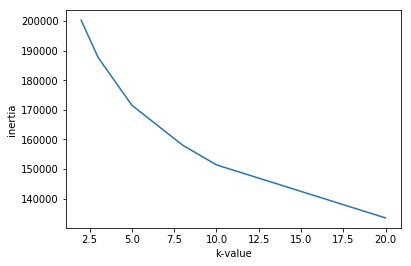

In [107]:
plt.plot(k_s, scores)
plt.xlabel('k-value')
plt.ylabel('inertia')
plt.show()

**K=10 seems to be the elbow for the above graph. So taking K=10 as our best model and plotting other data.**

### EDA on `Essay` column for different clusters

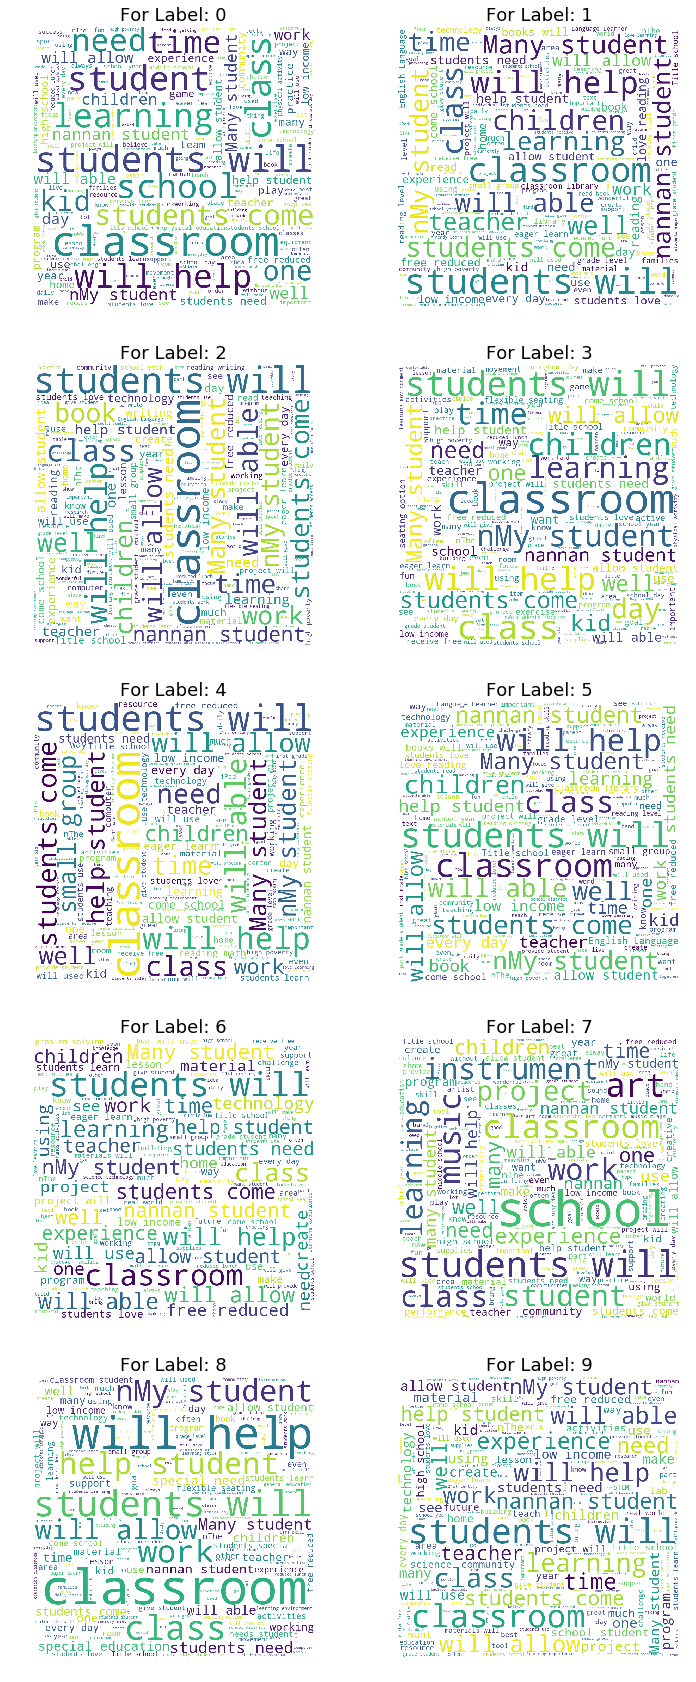

In [170]:
wordclouds(kmeans_models[10].labels_, 10, 50000, shape=(5, 2))

**We can see that lot of words are common for all groups. These may be due to their high frequency in the essays. Some of these words are `students`, `classroom`, `will help`. But we can see some clusters have unique words from which we may have some intuition on how these are clustered. such as Word `music` in cluster_7 and `small group` in cluster_4 and `book` in cluster_2.  To find good words, Below code block will give words which are found in high frequency in one cluster and less frequently in others.**

In [394]:
from tqdm import tqdm_notebook
import copy

In [395]:
kmeans_essay_counters = [Counter() for i in range(10)]
lab = kmeans_models[10].labels_
all_essays = project_data['essay']
for ind, es in enumerate(tqdm_notebook(all_essays)):
    kmeans_essay_counters[lab[ind]] += Counter(es.split())

In [396]:
print("len of counter keys for each cluster: ")
for i in range(10):
    print(len(kmeans_essay_counters[i].keys()))

len of counter keys for each cluster: 
47395
45723
50979
44402
43523
55758
51674
43143
52272
51301


In [397]:
kmeans_counter_diff = copy.deepcopy(kmeans_essay_counters)
for i in range(10):
    for j in range(10):
        if i != j:
            kmeans_counter_diff[i] -= kmeans_essay_counters[j]
print("len of words that are highly present in one cluster")
for i in range(10):
    print(len(kmeans_counter_diff[i].keys()))

len of words that are highly present in one cluster
14286
12365
14914
12542
11275
17758
15828
13601
16121
16258


In [401]:
kmeans_most_common_sum = np.sum([len(kmeans_counter_diff[i].keys()) for i in range(10)])
print(f'Total most common words for all clusters is: {kmeans_most_common_sum}')

Total most common words for all clusters is: 144948


In [412]:
print("Top 10 most common words for each cluster and least common in other clusters: ")
print('='*100)
for i in range(10):
    print(f"Cluster {i}:")
    tpls = kmeans_counter_diff[i].most_common(10)
    print([x[0] for x in tpls])

Top 10 most common words for each cluster and least common in other clusters: 
Cluster 0:
['athletes', 'soccer', 'basketball', 'sports', 'baseball', 'sport', 'volleyball', 'student-athletes', 'athletic', 'wrestling']
Cluster 1:
['Chicka', 'Boom', 'Yourself,', 'Ember', 'Fish,', 'mp3', 'Scrabble', 'Flashlight', 'Crane', 'nonfiction!']
Cluster 2:
['Kill', 'SCOPE', 'Mockingbird', "authors'", 'Bound', 'revising,', 'Common-Core', 'drafting,', "Wilson's", 'MLA']
Cluster 3:
['Wii', 'nutrient', 'scooters', 'kickball', 'inclement', 'lotion', 'GoNoodle', 'hula', 'trikes', 'sugary']
Cluster 4:
["Mini's", 'self-manager', 'GLEAM', 'Ellie', 'Starfall', '2-digit', 'Warlick\\r\\n\\r\\nMy', 'sandpaper', 'ONLINE.', 'Epic!']
Cluster 5:
['Romeo', 'Newcomer', 'Latino/a', 'cowboy', 'cowgirl', 'dystopian', 'book!nannan', 'Lambs', 'I-station', 'hardcover']
Cluster 6:
['Dash', 'robots', 'Coding', 'Magformers', 'Pizza', '2016).', 'incubator', "Maker's", 'Ozobot', '(code.org,']
Cluster 7:
['music', 'art', 'instru

**Now this gives a clear view on how our model is clustered. You can see clearly that cluster_7 is clustered based on music related terms in essay. i.e. if there is anything related to music in the essay that project belongs to cluster_7. And Cluster_0 is clustered based on sports keywords in the essay. And cluster_8 is clustered based on the children disabilities mentioned in essay. Based on this info I will try to construct how our kmeans clustering worked.**

**Interpretation of 10 Clusters based on the info I got above.**
- **Cluster 0: Sports Related Projects**
- **Cluster 1: Playing Materials (like Scrabble, Crane, Flashlight) Projects**
- **Cluster 2: Not Sure about this cluster**
- **Cluster 3: Mixture of Projects related to playing with vehicles, food, and health**
- **Cluster 4: Not Sure about this cluster**
- **Cluster 5: Mixture of Projects related to diverse students, books. etc.**
- **Cluster 6: Projects related to robotics and coding**
- **Cluster 7: Projects related to Music**
- **Cluster 8: Projects which have students with disabilities**
- **Cluster 9: Projects which are related to Science and mathematics (education related projects)**

**Kmeans gave high interpretability when coming to how it clustered the data.**

**Taking average values and distributions of some features to see if they differ from each other.**

In [171]:
kmeans = kmeans_models[10]

In [172]:
kmeans_data = [project_data.iloc[list(filter(lambda i: kmeans.labels_[i]==j, range(50000)))] for j in range(10)]

for i in range(10):
    print(kmeans_data[i].shape)

(4187, 21)
(5025, 21)
(5656, 21)
(4248, 21)
(5086, 21)
(6317, 21)
(5394, 21)
(3490, 21)
(5793, 21)
(4804, 21)


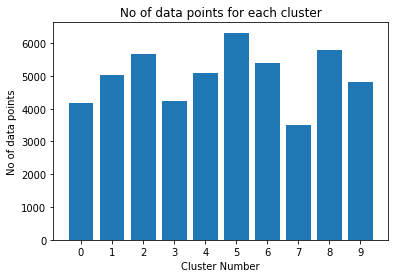

In [174]:
plt.bar(range(10), [len(kmeans_data[i]) for i in range(10)])
plt.title('No of data points for each cluster')
plt.xlabel('Cluster Number')
plt.xticks(range(10), range(10))
plt.ylabel('No of data points')
plt.show()

**Taking below features to see the distributions of the new clustered data**
- **`project_is_approved`**
- **`teacher_number_of_previously_posted_projects`**
- **`price`**

### EDA on `project_is_approved` column for different clusters

In [175]:
appr_value_counts = [kmeans_data[i]['project_is_approved'].value_counts() for i in range(10)]
indices = ['cluster_'+str(i) for i in range(10)]
tempDF = pd.DataFrame(appr_value_counts, index=indices)
tempDF.columns=['Approved', 'Rejected']
print(tempDF)

           Approved  Rejected
cluster_0      3498       689
cluster_1      4433       592
cluster_2      4944       712
cluster_3      3631       617
cluster_4      4427       659
cluster_5      5455       862
cluster_6      4422       972
cluster_7      2925       565
cluster_8      4831       962
cluster_9      3923       881


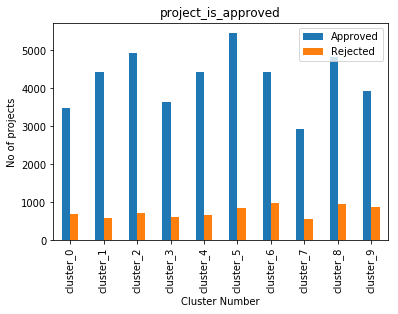

In [176]:
tempDF.plot.bar()
plt.title('project_is_approved')
plt.ylabel('No of projects')
plt.xlabel('Cluster Number')
plt.show()

**The above plot shows that our data is not clustered according to the approval of projects as the approved and rejected projects are in same ratio for all clusters. To make sure that is the case we can calculate the ratio values.**

In [179]:
app_rej_ratio = tempDF['Approved']/tempDF['Rejected']
print(app_rej_ratio)

cluster_0    5.076923
cluster_1    7.488176
cluster_2    6.943820
cluster_3    5.884927
cluster_4    6.717754
cluster_5    6.328306
cluster_6    4.549383
cluster_7    5.176991
cluster_8    5.021830
cluster_9    4.452894
dtype: float64


**The ratios seems to be in range 4.5 and 7.5 which is not a wide range. So, we can conclude that the clustering has no effect on the project being approved or rejected.**

### EDA on `teacher_number_of_previously_posted_projects` column for different clusters

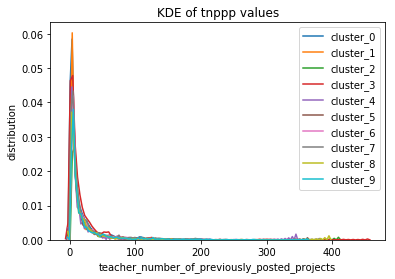

In [188]:
for i in range(10):
    sns.kdeplot(kmeans_data[i]['teacher_number_of_previously_posted_projects'], label='cluster_'+str(i))
plt.title('KDE of tnppp values')
plt.ylabel('distribution')
plt.xlabel('teacher_number_of_previously_posted_projects')
# plt.xlim(-10, 75)
plt.show()

**The above graph is not that interpretable and the values seems to be following log-normal distribution. So I take log of the column values and get the mean and standard deviation values for the log values in all the clusters.**

In [191]:
import math

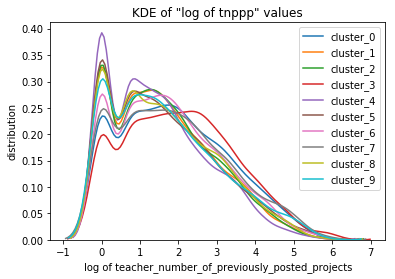

In [211]:
for i in range(10):
    sns.kdeplot(np.ma.masked_invalid(np.log(kmeans_data[i]['teacher_number_of_previously_posted_projects'])),\
                label='cluster_'+str(i))
plt.title('KDE of "log of tnppp" values')
plt.ylabel('distribution')
plt.xlabel('log of teacher_number_of_previously_posted_projects')
# plt.xlim(-10, 75)
plt.show()

**There is not much difference between the values of clusters except for cluster_3 which has slightly different `teacher_number_of_previously_posted_projects` values compared to other clusters. Let us confirm this by taking mean and standard deviation values of this column and plot them**

In [273]:
tnppp_means = [np.ma.masked_invalid(np.log(kmeans_data[i]['teacher_number_of_previously_posted_projects'])).mean()\
               for i in range(10)]
tnppp_stds = [np.ma.masked_invalid(np.log(kmeans_data[i]['teacher_number_of_previously_posted_projects'])).std()\
              for i in range(10)]
indices = ['cluster_'+str(i) for i in range(10)]
tempDF = pd.DataFrame([tnppp_means, tnppp_stds]).T
tempDF.index = indices
tempDF.columns = ['Mean', 'std-dev']
print(tempDF)

               Mean   std-dev
cluster_0  1.903602  1.383545
cluster_1  1.613550  1.300998
cluster_2  1.622134  1.307345
cluster_3  2.058067  1.406533
cluster_4  1.477773  1.256646
cluster_5  1.620850  1.352346
cluster_6  1.764175  1.341149
cluster_7  1.860558  1.418303
cluster_8  1.642981  1.334047
cluster_9  1.679812  1.387313


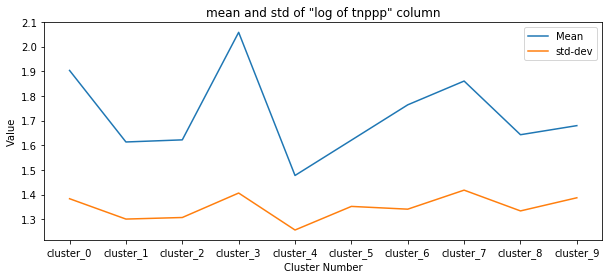

In [275]:
tempDF.plot(figsize=(10, 4))
plt.title('mean and std of "log of tnppp" column')
plt.ylabel('Value')
plt.xlabel('Cluster Number')
plt.xticks(range(10), indices)
plt.show()

**According to `teacher_number_of_previously_posted_projects` column (as per above plot) the clusters are not that different from one-another except for one cluster which have slightly high values of this column. But the overlap from other clusters is high which suggests that our clustering model has no effect on this column as well.**

### EDA on `price` column for different clusters

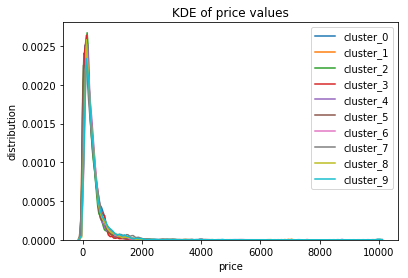

In [212]:
for i in range(10):
    sns.kdeplot(kmeans_data[i]['price'], label='cluster_'+str(i))
plt.title('KDE of price values')
plt.ylabel('distribution')
plt.xlabel('price')
# plt.xlim(-10, 2000)
plt.show()

**seems to be log-normal distribution. So taking log values.**

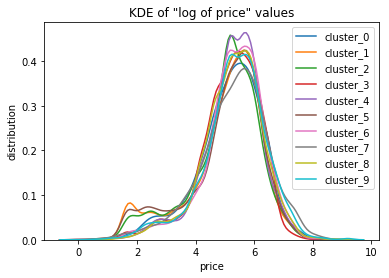

In [213]:
for i in range(10):
    sns.kdeplot(np.ma.masked_invalid(np.log(kmeans_data[i]['price'])), label='cluster_'+str(i))
plt.title('KDE of "log of price" values')
plt.ylabel('distribution')
plt.xlabel('price')
# plt.xlim(-10, 2000)
plt.show()

In [276]:
tnppp_means = [np.ma.masked_invalid(np.log(kmeans_data[i]['price'])).mean() for i in range(10)]
tnppp_stds = [np.ma.masked_invalid(np.log(kmeans_data[i]['price'])).std() for i in range(10)]
indices = ['cluster_'+str(i) for i in range(10)]
tempDF = pd.DataFrame([tnppp_means, tnppp_stds]).T
tempDF.index = indices
tempDF.columns = ['Mean', 'std-dev']
print(tempDF)

               Mean   std-dev
cluster_0  5.172160  1.111222
cluster_1  4.991355  1.301581
cluster_2  4.998652  1.215916
cluster_3  5.190871  1.023301
cluster_4  5.250321  1.009077
cluster_5  5.003846  1.316636
cluster_6  5.305237  1.053139
cluster_7  5.297122  1.183745
cluster_8  5.267095  1.028521
cluster_9  5.318590  1.114761


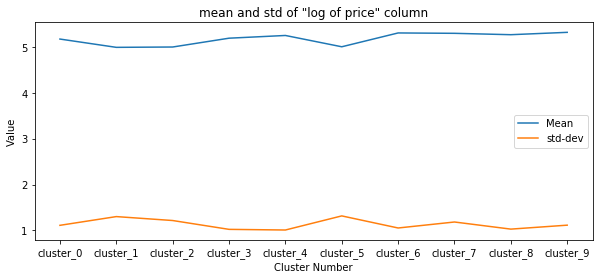

In [277]:
tempDF.plot(figsize=(10, 4))
plt.title('mean and std of "log of price" column')
plt.ylabel('Value')
plt.xlabel('Cluster Number')
plt.xticks(range(10), indices)
plt.show()

**There is no difference between the price values for clusters. This can be seen in the kdeplot as well. So our data is not clustered according to price values.**

**These above columns didnt show any difference which means our clustering is done mainly based on essay data. which make sense as lot of our columns are generated from essay data. This may be true for Agglomerative and DBSCAN models also.**

In [121]:
from tqdm import tqdm_notebook

In [122]:
# from collections import Counter

# word_count_kmeans = ['', '']
# word_count_kmeans[0] = Counter()
# word_count_kmeans[1] = Counter()

# for i in tqdm_notebook(range(20000)):
#     ess = project_data.iloc[i]['essay'].lower()
#     temp_count = Counter(ess.split())
#     word_count_kmeans[kmeans.labels_[i]] = word_count_kmeans[kmeans.labels_[i]] + temp_count

# word_count_kmeans[0] = set(map(lambda x: x[0], word_count_kmeans[0].most_common(1000)))
# word_count_kmeans[1] = set(map(lambda x: x[0], word_count_kmeans[1].most_common(1000)))

In [123]:
# words_diff_0 = word_count_kmeans[0].difference(word_count_kmeans[1])
# words_diff_1 = word_count_kmeans[1].difference(word_count_kmeans[0])

# print(len(words_diff_0))
# print(len(words_diff_1))

<h2>2.6 Apply AgglomerativeClustering</h2>

In [124]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

**Reducing the dimentions of the data to train Agglomerative Clustering and DBSCAN.**

In [125]:
tfidf_matrix.shape

(50000, 5000)

In [126]:
kbest = SelectKBest(chi2, k=2000)
small_matrix = kbest.fit_transform(tfidf_matrix, y)
small_matrix = small_matrix[0:20000]
small_matrix = small_matrix.toarray()
print(small_matrix.shape)

(20000, 2000)


**Using data with shape (20000, 2000) and taking number of clusters as (2, 5, 8) to do the Agglomerative clustering. And to compare the models we use `silhouette_score` and `davies_bouldin_score` as we dont have centers to calculate inertia**

In [127]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

In [128]:
k_s = [2, 5, 8]
silh_scores = []
db_scores = []
aggCluster_models = {}
for k in k_s:
    aggClust = AgglomerativeClustering(n_clusters=k)
    aggClust.fit(small_matrix)
    score = silhouette_score(small_matrix, aggClust.labels_)
    silh_scores.append(score)
    score = davies_bouldin_score(small_matrix, aggClust.labels_)
    db_scores.append(score)
    aggCluster_models[k] = aggClust
    print(f"score for k = {k} is: {score}")

score for k = 2 is: 2.9795516588859767
score for k = 5 is: 2.7266558900038285
score for k = 8 is: 2.2028455871266823


**Adding k=15 to the models as the scores are improving with higher k value.**

In [129]:
k_s.append(15)
aggClust = AgglomerativeClustering(n_clusters=15)
aggClust.fit(small_matrix)
score = silhouette_score(small_matrix, aggClust.labels_)
silh_scores.append(score)
score = davies_bouldin_score(small_matrix, aggClust.labels_)
db_scores.append(score)
aggCluster_models[15] = aggClust
print(f"davies_bouldin_score for k = 15 is: {score}")

davies_bouldin_score for k = 15 is: 2.395057238788369


**Above scores are `davies_bouldin_score` which means the lower the score the better the model is.**

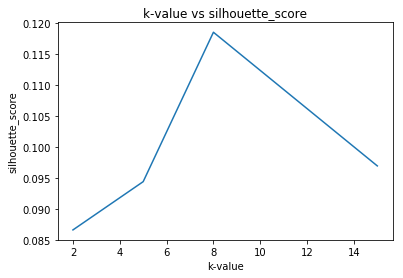

In [130]:
plt.plot(k_s, silh_scores)
plt.xlabel('k-value')
plt.ylabel('silhouette_score')
plt.title('k-value vs silhouette_score')
plt.show()

**The above scores are `silhouette_score` which means the higher the score the better the model. which means the model with k=8 is better than other models.**

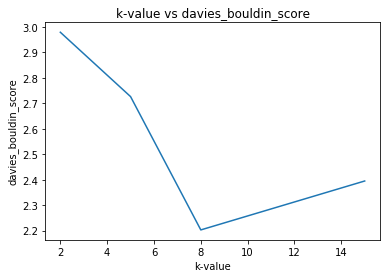

In [131]:
plt.plot(k_s, db_scores)
plt.xlabel('k-value')
plt.ylabel('davies_bouldin_score')
plt.title('k-value vs davies_bouldin_score')
plt.show()

**The above scores are `davies_bouldin_score` which means the lower the score the better the model. which means the model with k=8 is better than other models.**

**From first graph it is clear that k=8 is the best k and same k=8 can be seen in second graph as an elbow. So taking k=8 for plotting wordclouds and other data.**

**We can calculate the inertia for Aggleromative Clustering by creating the average of all points as the cluster centers. These inertia values can be used at end in conlusion prettytable to compare different models.**

In [264]:
aggClust = aggCluster_models[8]
agg_mat_data = [small_matrix[list(filter(lambda i: aggClust.labels_[i]==j, range(20000)))] for j in range(8)]

In [265]:
agg8_inertia = 0
for i in range(8):
    clus_cent = agg_mat_data[i].mean()
    agg8_inertia += ((agg_mat_data[i] - clus_cent)**2).sum().sum()

In [266]:
print(agg8_inertia)

94623.82897527562


### EDA on `Essay` column for different clusters

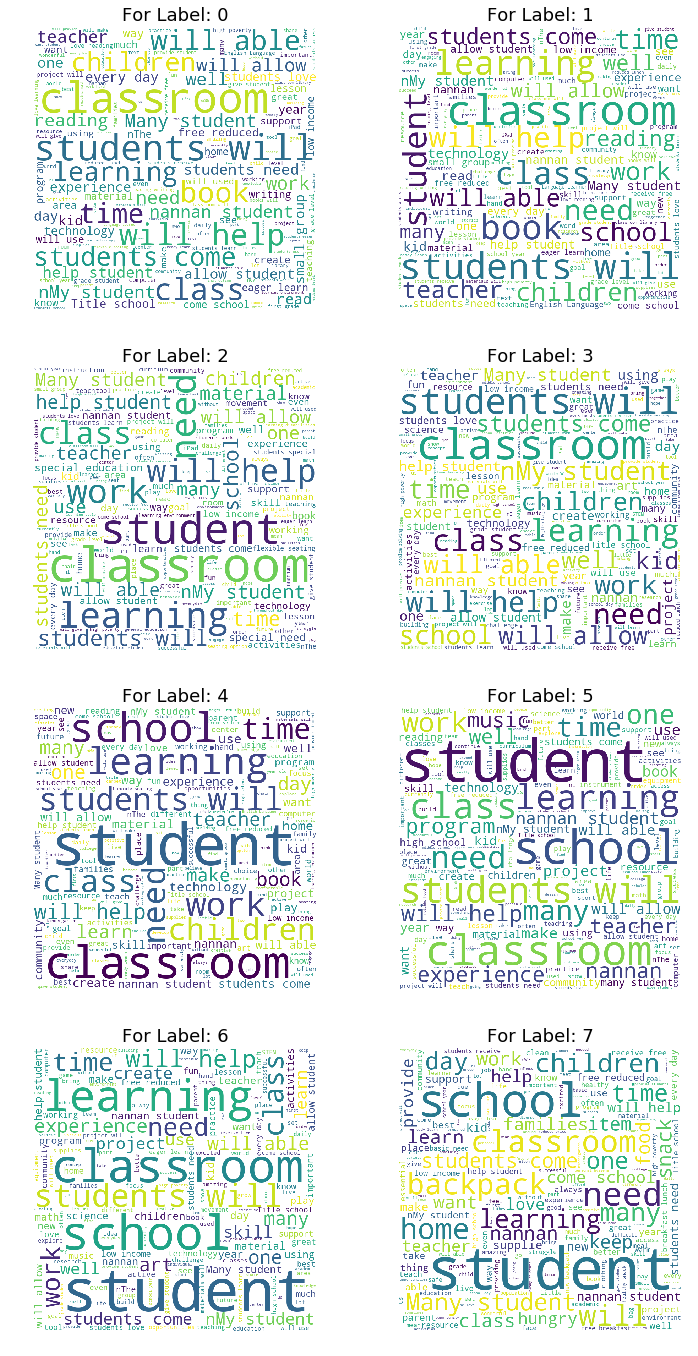

In [132]:
wordclouds(aggCluster_models[8].labels_, 8, 20000, shape=(4, 2))

**We can see that lot of words are common for all 8 groups. These may be due to their high frequency in the essays. Some of these words are `students`, `classroom`, `children` and `learning`. But we can see some clusters have unique words from which we may have some intuition on how these are clustered.**

In [398]:
agg_essay_counters = [Counter() for i in range(8)]
lab = aggCluster_models[8].labels_
all_essays = project_data['essay'][:20000]
for ind, es in enumerate(tqdm_notebook(all_essays)):
    agg_essay_counters[lab[ind]] += Counter(es.split())

In [399]:
print("len of counter keys for each cluster: ")
for i in range(8):
    print(len(agg_essay_counters[i].keys()))

len of counter keys for each cluster: 
43786
35767
32131
40508
24797
35911
33108
7188


In [400]:
agg_counter_diff = copy.deepcopy(agg_essay_counters)
for i in range(8):
    for j in range(8):
        if i != j:
            agg_counter_diff[i] -= agg_essay_counters[j]
print("len of words that are highly present in one cluster")
for i in range(8):
    print(len(agg_counter_diff[i].keys()))

len of words that are highly present in one cluster
17265
11704
10116
14564
5935
12680
10031
956


In [414]:
agg_most_common_sum = np.sum([len(agg_counter_diff[i].keys()) for i in range(8)])
print(f'Total most common words for all clusters is: {agg_most_common_sum}')

Total most common words for all clusters is: 83251


In [415]:
print("Top 10 most common words for each cluster and least common in other clusters: ")
print('='*100)
for i in range(8):
    print(f"Cluster {i}:")
    tpls = agg_counter_diff[i].most_common(10)
    print([x[0] for x in tpls])

Top 10 most common words for each cluster and least common in other clusters: 
Cluster 0:
['Boogie', 'reader', 'earbuds', 'novels.', 'boogie', 'Storyworks', 'Newbery', 'containing', 'reading!', 'flashlights']
Cluster 1:
['cowboy', 'cowgirl', 'Newcomer', 'Pads', 'Lambs', 'book!nannan', 'SSR', 'Mobile', 'Literature', 'Tank']
Cluster 2:
['sensory', 'disabilities', 'Autism', 'autism', 'speech', 'therapy', 'disabilities.', 'severe', 'Autism,', 'disabilities,']
Cluster 3:
['Wii', 'Magformers', 'roller', 'chicks', '3Doodler', 'kit,', 'pedal', 'gardening', 'Pizza', 'foldables']
Cluster 4:
['housekeeping', '\\"Comfy', 'Gelli', 'sewing', 'sew,', 'Advancement', 'Determination.', 'Shelly', 'patients', 'cloakroom']
Cluster 5:
['band', 'instruments', 'learners.Visual', 'instrument', 'drums', 'baseball', 'athletes', 'percussion', 'drum', 'ukuleles']
Cluster 6:
['belts', 'CPR', 'dissections.', '‘Move', 'dancers', 'Psychology', "K.'s", 'drumming', 'printmaking', 'soldering']
Cluster 7:
['backpacks', 'h

**Now this gives a clear view on how our model is clustered. You can see clearly that some clusters (such as Cluster_2 and Cluster_5) are choosen for specific projects**

**Interpretation of 8 Clusters based on the info I got above.**
- **Cluster 0: Projects related to Reading and libraries**
- **Cluster 1: Mixture of projects related to Students, and reading (not so sure about the cluster)**
- **Cluster 2: Projects which have students with disabilities**
- **Cluster 3: Projects which require Toys to the students**
- **Cluster 4: Projects related to housekeeping and sewing arts and etc..**
- **Cluster 5: Projects related to Music instruments and sports (related to extra-curricular activities)**
- **Cluster 6: Mix of projects related to arts (dance printmaking), and sensitive operations (i.e. CPR, dissections, soldering.. not sure about this one)**
- **Cluster 7: Projects which require bags, clothing (jackets, socks), and soap and deoderants**

**Taking average values and distributions of some features to see if they differ from each other.**

In [258]:
aggClust = aggCluster_models[8]
aggClust_data = [project_data.iloc[list(filter(lambda i: aggClust.labels_[i]==j, range(20000)))] for j in range(8)]

In [134]:
for i in range(8):
    print(aggClust_data[i].shape)

(4673, 21)
(3100, 21)
(2549, 21)
(3382, 21)
(1469, 21)
(2348, 21)
(2229, 21)
(250, 21)


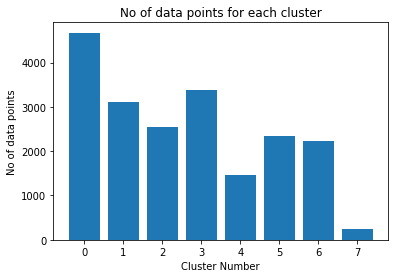

In [135]:
plt.bar(range(8), [len(aggClust_data[i]) for i in range(8)])
plt.title('No of data points for each cluster')
plt.xlabel('Cluster Number')
plt.ylabel('No of data points')
plt.show()

**The data in cluster 7 is very less so we may expect lot different values from other clusters.**

**Taking below features to see the distributions of the new clustered data**
- **`project_is_approved`**
- **`teacher_number_of_previously_posted_projects`**
- **`price`**

### EDA on `project_is_approved` column for different clusters

In [136]:
appr_value_counts = [aggClust_data[i]['project_is_approved'].value_counts() for i in range(8)]
indices = ['cluster_'+str(i) for i in range(8)]
tempDF = pd.DataFrame(appr_value_counts, index=indices)
tempDF.columns=['Approved', 'Rejected']
print(tempDF)

           Approved  Rejected
cluster_0      4096       577
cluster_1      2690       410
cluster_2      2131       418
cluster_3      2817       565
cluster_4      1211       258
cluster_5      1992       356
cluster_6      1848       381
cluster_7       233        17


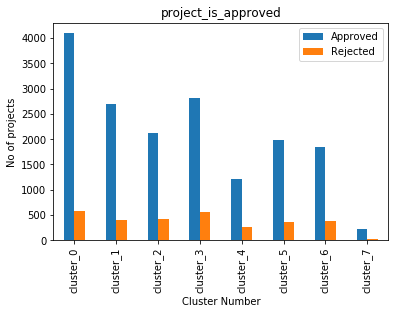

In [137]:
tempDF.plot.bar()
plt.title('project_is_approved')
plt.ylabel('No of projects')
plt.xlabel('Cluster Number')
plt.show()

**The above plot shows that our data is not clustered according to the approval of projects as the approved and rejected projects are in same ratio for all clusters. To make sure that is the case we can calculate the ratio values.**

In [138]:
tempDF['Approved']/tempDF['Rejected']

cluster_0     7.098787
cluster_1     6.560976
cluster_2     5.098086
cluster_3     4.985841
cluster_4     4.693798
cluster_5     5.595506
cluster_6     4.850394
cluster_7    13.705882
dtype: float64

**The ratios seems to be in range 4.7 and 7.1 (except for cluster_7) which is not a wide range. So, we can conclude that the clustering has no effect on the project being approved or rejected.**

### EDA on `teacher_number_of_previously_posted_projects` column for different clusters

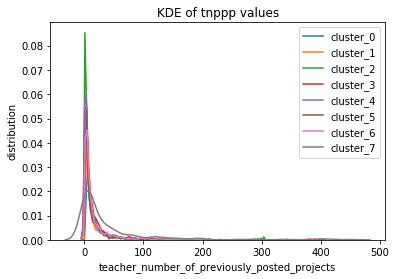

In [268]:
for i in range(8):
    sns.kdeplot(aggClust_data[i]['teacher_number_of_previously_posted_projects'], label='cluster_'+str(i))
plt.title('KDE of tnppp values')
plt.ylabel('distribution')
plt.xlabel('teacher_number_of_previously_posted_projects')
# plt.xlim(-10, 60)
plt.show()

**Taking log of teacher_number_of_previously_posted_projects column as it seems to be log-normal.**

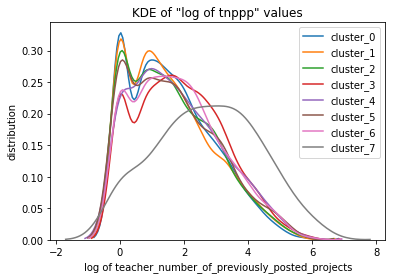

In [269]:
for i in range(8):
    sns.kdeplot(np.ma.masked_invalid(np.log(aggClust_data[i]['teacher_number_of_previously_posted_projects'])),\
                label='cluster_'+str(i))
plt.title('KDE of "log of tnppp" values')
plt.ylabel('distribution')
plt.xlabel('log of teacher_number_of_previously_posted_projects')
# plt.xlim(-10, 60)
plt.show()

**Cluster_3 seems to be different (apart from cluster_7). So taking mean and standard deviation values for this column in all the clusters.**

In [270]:
tnppp_means = [np.ma.masked_invalid(np.log(aggClust_data[i]['teacher_number_of_previously_posted_projects'])).mean() for i in range(8)]
tnppp_stds = [np.ma.masked_invalid(np.log(aggClust_data[i]['teacher_number_of_previously_posted_projects'])).std() for i in range(8)]
indices = ['cluster_'+str(i) for i in range(8)]
tempDF = pd.DataFrame([tnppp_means, tnppp_stds]).T
tempDF.index = indices
tempDF.columns = ['Mean', 'std-dev']
print(tempDF)

               Mean   std-dev
cluster_0  1.599306  1.297170
cluster_1  1.580585  1.319702
cluster_2  1.617973  1.334303
cluster_3  1.890598  1.350776
cluster_4  1.768192  1.373228
cluster_5  1.677288  1.378174
cluster_6  1.800345  1.356202
cluster_7  2.711283  1.576097


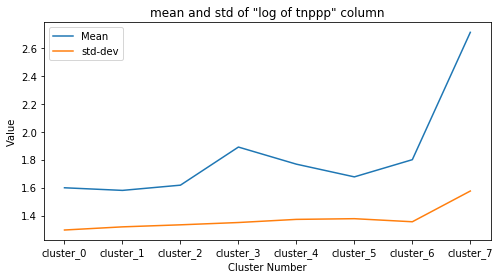

In [271]:
tempDF.plot(figsize=(8, 4))
plt.title('mean and std of "log of tnppp" column')
plt.ylabel('Value')
plt.xlabel('Cluster Number')
plt.xticks(range(8), indices)
plt.show()

**This column is not divided by any of the clusters as you can see all the clusters have almost same mean values (except for cluster_7 as it has less data points this mean, std-dev is expected)**

### EDA on `price` column for different clusters

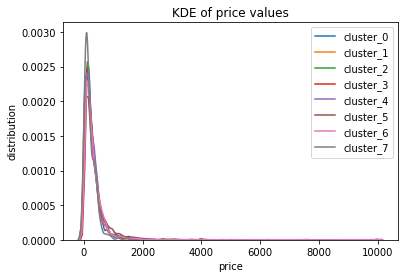

In [279]:
for i in range(8):
    sns.kdeplot(aggClust_data[i]['price'], label='cluster_'+str(i))
plt.title('KDE of price values')
plt.ylabel('distribution')
plt.xlabel('price')
# plt.xlim(-10, 2000)
plt.show()

**Applying log to plot price.**

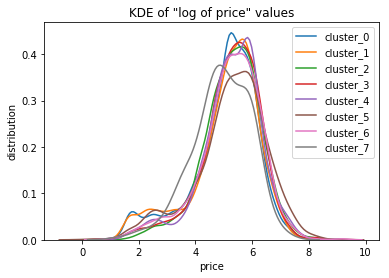

In [280]:
for i in range(8):
    sns.kdeplot(np.ma.masked_invalid(np.log(aggClust_data[i]['price'])), label='cluster_'+str(i))
plt.title('KDE of "log of price" values')
plt.ylabel('distribution')
plt.xlabel('price')
# plt.xlim(-10, 2000)
plt.show()

In [281]:
tnppp_means = [np.ma.masked_invalid(np.log(aggClust_data[i]['price'])).mean() for i in range(8)]
tnppp_stds = [np.ma.masked_invalid(np.log(aggClust_data[i]['price'])).std() for i in range(8)]
indices = ['cluster_'+str(i) for i in range(8)]
tempDF = pd.DataFrame([tnppp_means, tnppp_stds]).T
tempDF.index = indices
tempDF.columns = ['Mean', 'std-dev']
print(tempDF)

               Mean   std-dev
cluster_0  5.029477  1.207629
cluster_1  5.043506  1.241439
cluster_2  5.286397  0.997947
cluster_3  5.256561  1.058493
cluster_4  5.257313  1.068656
cluster_5  5.248063  1.271640
cluster_6  5.220311  1.120565
cluster_7  4.921120  1.017054


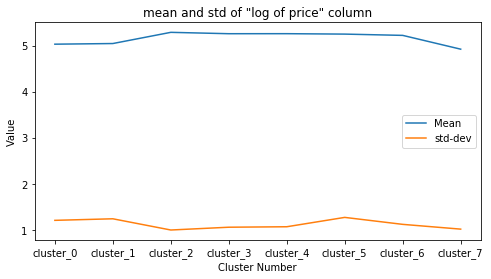

In [282]:
tempDF.plot(figsize=(8, 4))
plt.title('mean and std of "log of price" column')
plt.ylabel('Value')
plt.xlabel('Cluster Number')
plt.xticks(range(8), indices)
plt.show()

**There is no difference between the price values for clusters. This can be seen in the kdeplot So our data is not clustered according to price values.**

**And this column is also evenly distributed accross the clusters. Showing that again this data is clustered mostly on essays data.**

In [145]:
# from collections import Counter

# word_count_agg = ['', '', '']
# word_count_agg[0] = Counter()
# word_count_agg[1] = Counter()
# word_count_agg[2] = Counter()

# for i in tqdm_notebook(range(20000)):
#     ess = project_data.iloc[i]['essay'].lower()
#     temp_count = Counter(ess.split())
#     word_count_agg[aggClust3.labels_[i]] = word_count_agg[aggClust3.labels_[i]] + temp_count

# word_count_agg[0] = set(map(lambda x: x[0], word_count_agg[0].most_common(1000)))

In [146]:
# word_count_agg[1] = set(map(lambda x: x[0], word_count_agg[1].most_common(1000)))
# word_count_agg[2] = set(map(lambda x: x[0], word_count_agg[2].most_common(1000)))

In [147]:
# words_diff_agg_0 = word_count_agg[0].difference(word_count_agg[1]).difference(word_count_agg[2])
# words_diff_agg_1 = word_count_agg[1].difference(word_count_agg[0]).difference(word_count_agg[2])
# words_diff_agg_2 = word_count_agg[2].difference(word_count_agg[1]).difference(word_count_agg[0])

# print(len(words_diff_agg_0))
# print(len(words_diff_agg_1))
# print(len(words_diff_agg_2))

<h2>2.7 Apply DBSCAN</h2>

In [148]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

**Before we take a eps we need to see what is our optimal `minPts`. According to below source I take `minPts = ln(n) = ln(20000) = 9.903 ~= 10`.**

**Source: https://stackoverflow.com/questions/12893492/choosing-eps-and-minpts-for-dbscan-r/48558030#48558030**

**Importing KDTree to get distances of kth neighbors for each point.**

In [149]:
from sklearn.neighbors import KDTree

In [150]:
tree = KDTree(small_matrix)
dist, ind = tree.query(small_matrix, k=10)
kth_dist = dist[:, -1:].T[0]
kth_dist_sorted = sorted(kth_dist, reverse=True)

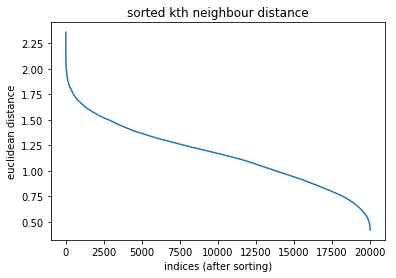

In [151]:
plt.plot(kth_dist_sorted)
plt.title('sorted kth neighbour distance')
plt.xlabel('indices (after sorting)')
plt.ylabel('euclidean distance')
plt.show()

**According to above graph we can choose eps=1.70 as it  seems to be the elbow of the graph.**

In [152]:
k=1.7
dbscan = DBSCAN(eps=k)
dbscan.fit(small_matrix)
if max(dbscan.labels_)!=0:
    score = silhouette_score(small_matrix, dbscan.labels_)
scores.append(score)
print(f"score for eps = {k} is: {score}")

score for eps = 1.7 is: 0.14038180017264476


In [153]:
print(f"davies_bouldin_score for DBSCAN Model with eps = 1.7: {davies_bouldin_score(small_matrix, dbscan.labels_)}")

davies_bouldin_score for DBSCAN Model with eps = 1.7: 3.3021323178892636


**Calculating inertia for DBSCAN model by taking mean of cluster points as cluster centers.**

In [286]:
dbscan_matrix = [None, None]
dbscan_matrix[0] = small_matrix[list(filter(lambda i: dbscan.labels_[i]==0, range(20000)))]
dbscan_matrix[1] = small_matrix[list(filter(lambda i: dbscan.labels_[i]==1, range(20000)))]

dbscan2_inertia = 0
for i in range(2):
    clus_cent = dbscan_matrix[i].mean()
    dbscan2_inertia += ((dbscan_matrix[i] - clus_cent)**2).sum().sum()

In [287]:
print(f"Calculated inertia for DBSCAN algorithm is: {dbscan2_inertia}")

Calculated inertia for DBSCAN algorithm is: 94134.20973899585


In [288]:
max(dbscan.labels_)+1

2

### EDA on `Essay` column for different clusters

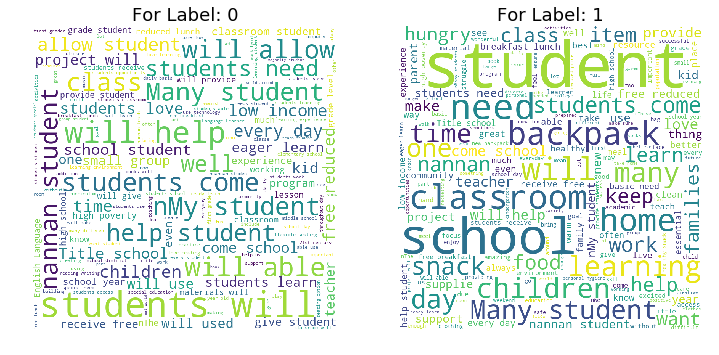

In [155]:
noc = max(dbscan.labels_)+1
wordclouds(dbscan.labels_, noc, 20000, shape=(1, 2))

In [386]:
dbscan_essay_counters = [Counter() for i in range(2)]
lab = dbscan.labels_
all_essays = project_data['essay'][:20000]
for ind, es in enumerate(tqdm_notebook(all_essays)):
    dbscan_essay_counters[lab[ind]] += Counter(es.split())

In [391]:
print(len(dbscan_essay_counters[0].keys()))
print(len(dbscan_essay_counters[1].keys()))

118422
9051


In [389]:
dbscan_counter_diff = copy.deepcopy(dbscan_essay_counters)
for i in range(2):
    for j in range(2):
        if i != j:
            dbscan_counter_diff[i] -= dbscan_essay_counters[j]
print(len(dbscan_counter_diff[0].keys()))
print(len(dbscan_counter_diff[1].keys()))

117951
1281


In [417]:
dbscan_most_common_sum = np.sum([len(dbscan_counter_diff[i].keys()) for i in range(2)])
print(f'Total most common words for all clusters is: {dbscan_most_common_sum}')

Total most common words for all clusters is: 119232


In [418]:
print("Top 10 most common words for each cluster and least common in other clusters: ")
print('='*100)
for i in range(2):
    print(f"Cluster {i}:")
    tpls = dbscan_counter_diff[i].most_common(10)
    print([x[0] for x in tpls])

Top 10 most common words for each cluster and least common in other clusters: 
Cluster 0:
['to', 'and', 'the', 'students', 'a', 'of', 'in', 'are', 'will', 'their']
Cluster 1:
['backpacks', 'hygiene', 'deodorant,', 'soap,', 'deodorant', 'shampoo,', 'socks', 'toothpaste,', 'backpacks,', 'jackets,']


**Interpretation of 2 Clusters based on the info I got above.**
- **Cluster 1: Projects which require bags, clothing (jackets, socks), and soap and deoderants etc..**
- **Cluster 0: All Other projects (As it has all common english words as high frequency words)**

**Comparing the below numerical columns for DBSCAN clustering.**
- **`project_is_approved`**
- **`teacher_number_of_previously_posted_projects`**
- **`price`**

In [156]:
dbscan_data_0 = project_data.iloc[list(filter(lambda i: dbscan.labels_[i]==0, range(20000)))]
dbscan_data_1 = project_data.iloc[list(filter(lambda i: dbscan.labels_[i]==1, range(20000)))]

print(dbscan_data_0.shape)
print(dbscan_data_1.shape)

(19683, 21)
(243, 21)


### EDA on `project_is_approved` column for different clusters

In [157]:
tempDF = pd.DataFrame([dbscan_data_0['project_is_approved'].value_counts(), dbscan_data_1['project_is_approved'].value_counts()]\
             , index=['cluster_0', 'cluster_1'])
print(tempDF)

               1     0
cluster_0  16740  2943
cluster_1    227    16


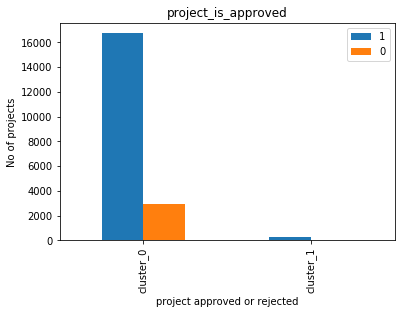

In [158]:
tempDF.plot.bar()
plt.title('project_is_approved')
plt.ylabel('No of projects')
plt.xlabel('project approved or rejected')
plt.show()

**The above plot shows that our data is somewhat clustered according to the approval of projects and we need to see the approval to rejection ratio which you can see in below code block**

In [159]:
print("approval to rejected ratio (i.e. approved_projects/rejected_projects)")
print(tempDF[1]/tempDF[0])

approval to rejected ratio (i.e. approved_projects/rejected_projects)
cluster_0     5.688073
cluster_1    14.187500
dtype: float64


**We can see that cluster_1 has high approval rate but this doesnt say amything about the data, as we have very less values in second cluster, probability of having approval clusters is amplified than normal.**

In [160]:
dbscan_data = [dbscan_data_0, dbscan_data_1]

### EDA on `teacher_number_of_previously_posted_projects` column for different clusters

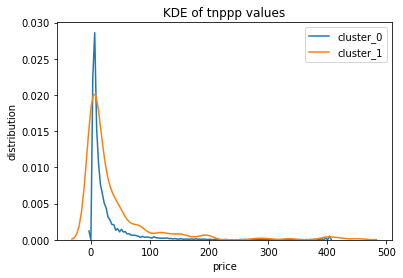

In [289]:
for i in range(2):
    sns.kdeplot(dbscan_data[i]['teacher_number_of_previously_posted_projects'], label='cluster_'+str(i))
plt.title('KDE of tnppp values')
plt.ylabel('distribution')
plt.xlabel('price')
# plt.xlim(-10, 60)
plt.show()

**Applying log for the values.**

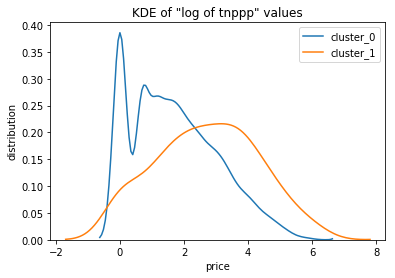

In [290]:
for i in range(2):
    sns.kdeplot(np.ma.masked_invalid(np.log(dbscan_data[i]['teacher_number_of_previously_posted_projects'])),\
                label='cluster_'+str(i))
plt.title('KDE of "log of tnppp" values')
plt.ylabel('distribution')
plt.xlabel('price')
# plt.xlim(-10, 60)
plt.show()

**The above graph is not that interpretable. So I take mean and standard deviation values for this column in all the clusters.**

In [296]:
tnppp_means = [np.ma.masked_invalid(np.log(dbscan_data[i]['teacher_number_of_previously_posted_projects'])).mean()\
               for i in range(2)]
tnppp_stds = [np.ma.masked_invalid(np.log(dbscan_data[i]['teacher_number_of_previously_posted_projects'])).std()\
              for i in range(2)]
indices = ['cluster_'+str(i) for i in range(2)]
tempDF = pd.DataFrame([tnppp_means, tnppp_stds]).T
tempDF.index = indices
tempDF.columns = ['Mean', 'std-dev']
print("mean and std-dev values of Log of teacher_number_of_previously_posted_projects")
print('='*75)
print(tempDF)

mean and std-dev values of Log of teacher_number_of_previously_posted_projects
               Mean   std-dev
cluster_0  1.696652  1.341040
cluster_1  2.711628  1.569093


### EDA on `price` column for different clusters

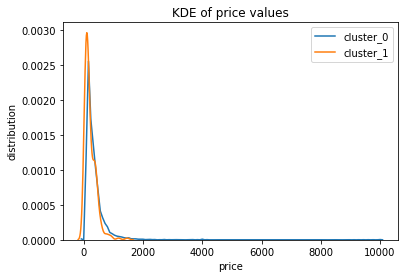

In [299]:
for i in range(2):
    sns.kdeplot(dbscan_data[i]['price'], label='cluster_'+str(i))
plt.title('KDE of price values')
plt.ylabel('distribution')
plt.xlabel('price')
# plt.xlim(-10, 2000)
plt.show()

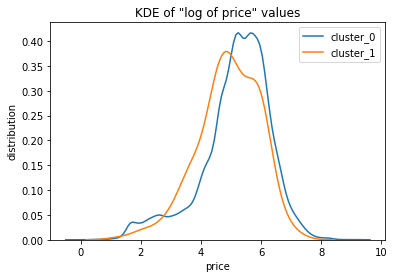

In [301]:
for i in range(2):
    sns.kdeplot(np.ma.masked_invalid(np.log(dbscan_data[i]['price'])), label='cluster_'+str(i))
plt.title('KDE of "log of price" values')
plt.ylabel('distribution')
plt.xlabel('price')
# plt.xlim(-10, 2000)
plt.show()

In [305]:
tnppp_means = [np.ma.masked_invalid(np.log(dbscan_data[i]['price'])).mean() for i in range(2)]
tnppp_stds = [np.ma.masked_invalid(np.log(dbscan_data[i]['price'])).std() for i in range(2)]
indices = ['cluster_'+str(i) for i in range(2)]
tempDF = pd.DataFrame([tnppp_means, tnppp_stds]).T
tempDF.index = indices
tempDF.columns = ['Mean', 'std-dev']
print("mean and std-dev values of Log of price")
print('='*40)
print(tempDF)

mean and std-dev values of Log of price
               Mean   std-dev
cluster_0  5.168422  1.156567
cluster_1  4.923183  1.021320


In [165]:
# from collections import Counter

# word_count_db = ['', '']
# word_count_db[0] = Counter()
# word_count_db[1] = Counter()

# for i in tqdm_notebook(range(20000)):
#     ess = project_data.iloc[i]['essay'].lower()
#     temp_count = Counter(ess.split())
#     word_count_db[dbscan2.labels_[i]] = word_count_db[dbscan2.labels_[i]] + temp_count

# word_count_db[0] = set(map(lambda x: x[0], word_count_db[0].most_common(1000)))
# word_count_db[1] = set(map(lambda x: x[0], word_count_db[1].most_common(1000)))

In [166]:
# words_diff_db_0 = word_count_db[0].difference(word_count_db[1])
# words_diff_db_1 = word_count_db[1].difference(word_count_db[0])

# print(len(words_diff_db_0))
# print(len(words_diff_db_1))

**Even in this model the numerical columns doesnt have much significance on the clustering.**

<h1>3. Conclusions</h1>
<br> Please write down few lines of your observations on this assignment.

In [167]:
from prettytable import PrettyTable

In [308]:
aggClust5 = aggCluster_models[5]
agg5_mat_data = [small_matrix[list(filter(lambda i: aggClust5.labels_[i]==j, range(20000)))] for j in range(5)]

In [309]:
agg5_inertia = 0
for i in range(5):
    clus_cent = agg5_mat_data[i].mean()
    agg5_inertia += ((agg5_mat_data[i] - clus_cent)**2).sum().sum()

**Inertia for Agglomeration Clustering and DBSCAN are calculated manually by taking mean of clusters as the cluster centers and calculating the sum of squred distances for all points to thier respective nearest neighbors.**

In [318]:
kmeans2_silh_score = silhouette_score(tfidf_matrix, kmeans_models[2].labels_)
kmeans8_silh_score = silhouette_score(tfidf_matrix, kmeans_models[8].labels_)
agg5_silh_score = silhouette_score(small_matrix, aggCluster_models[5].labels_)
agg8_silh_score = silhouette_score(small_matrix, aggCluster_models[8].labels_)
dbscan2_silh_score = silhouette_score(small_matrix, dbscan.labels_)

In [320]:
table = PrettyTable()
table.field_names = ['Model', 'hyper-parameter', 'No of clusters', 'inertia', 'silhouette_score']
table.add_row(['KMeans Clustering', 'n_clusters = 2', 2, kmeans_models[2].inertia_, kmeans2_silh_score])
table.add_row(['KMeans Clustering', 'n_clusters = 8', 8, kmeans_models[8].inertia_, kmeans8_silh_score])
table.add_row(['Aggloremative Clustering', 'n_clusters = 5', 5, agg5_inertia, agg5_silh_score])
table.add_row(['Aggloremative Clustering', 'n_clusters = 8', 8, agg8_inertia, agg8_silh_score])
table.add_row(['DBSCAN Clustering', 'eps = 1.7', 2, dbscan2_inertia, dbscan2_silh_score])
print(table)

+--------------------------+-----------------+----------------+--------------------+---------------------+
|          Model           | hyper-parameter | No of clusters |      inertia       |   silhouette_score  |
+--------------------------+-----------------+----------------+--------------------+---------------------+
|    KMeans Clustering     |  n_clusters = 2 |       2        | 200245.63959936163 | 0.09814386343740057 |
|    KMeans Clustering     |  n_clusters = 8 |       8        | 158087.0658110251  | 0.09790070710872138 |
| Aggloremative Clustering |  n_clusters = 5 |       5        | 94625.17437270339  | 0.09440044238401085 |
| Aggloremative Clustering |  n_clusters = 8 |       8        | 94623.82897527562  | 0.11847603599777828 |
|    DBSCAN Clustering     |    eps = 1.7    |       2        | 94134.20973899585  | 0.14038180017264476 |
+--------------------------+-----------------+----------------+--------------------+---------------------+


Forgot to Add Kmeans model with 10 clusters above which has inertia = 151435.24. I had to rerun the some prt of notebook (which takes long time in my laptop) to add this single line in the table. So please consider this.

**Conclusion**
- **Among all clusters DBSCAN did good in respect to score. It has a `silhouette_score` of `0.14` and `inertia (calculated)` of `94134`. But In interpretation It is very bad model.**
- **Clusters in DBSCAN is highly skewed (i.e. cluster_0 has high number of data points and cluster_1 has very low number of data points). So interpretation is not good**
- **All clustering models are clustered only based on essay data which makes sense. As we are using TFIDF vectors, lot of dimentions are from essay data**
- **Kmeans and Agglomerative Clustering did very well when it comes to Interpreting how the data is Clustered. The most common words in one cluster gave the main gist of the cluster. And from these models we can classify new projects into these clusters manually. Below are my interpretations on the clusters for different models.**

**Interpretation of 10 Clusters (KMeans) based on the info I got above.**
- **Cluster 0: Sports Related Projects**
- **Cluster 1: Playing Materials (like Scrabble, Crane, Flashlight) Projects**
- **Cluster 2: Not Sure about this cluster**
- **Cluster 3: Mixture of Projects related to playing with vehicles, food, and health**
- **Cluster 4: Not Sure about this cluster**
- **Cluster 5: Mixture of Projects related to diverse students, books. etc.**
- **Cluster 6: Projects related to robotics and coding**
- **Cluster 7: Projects related to Music**
- **Cluster 8: Projects which have students with disabilities**
- **Cluster 9: Projects which are related to Science and mathematics (education related projects)**

**Kmeans gave high interpretability when coming to how it clustered the data.**

**Interpretation of 8 Clusters (Agglomerative Clustering) based on the info I got above.**
- **Cluster 0: Projects related to Reading and libraries**
- **Cluster 1: Mixture of projects related to Students, and reading (not so sure about the cluster)**
- **Cluster 2: Projects which have students with disabilities**
- **Cluster 3: Projects which require Toys to the students**
- **Cluster 4: Projects related to housekeeping and sewing arts and etc..**
- **Cluster 5: Projects related to Music instruments and sports (related to extra-curricular activities)**
- **Cluster 6: Mix of projects related to arts (dance printmaking), and sensitive operations (i.e. CPR, dissections, soldering.. not sure about this one)**
- **Cluster 7: Projects which require bags, clothing (jackets, socks), and soap and deoderants**

**Interpretation of 2 Clusters (DBSCAN) based on the info I got above.**
- **Cluster 1: Projects which require bags, clothing (jackets, socks), and soap and deoderants etc..**
- **Cluster 0: All Other projects (As it has all common english words as high frequency words)**